In [1]:
#importing libraries  

from qiskit import QuantumCircuit 
from qiskit import transpile
from qiskit_aer import AerSimulator

from qiskit_ibm_runtime import SamplerV2
from qiskit_ibm_runtime import QiskitRuntimeService
#from qiskit.circuit.library import MCMT
from qiskit.visualization import plot_distribution
#from qiskit.circuit.library import Diagonal
#from qiskit.circuit.library import RGQFTMultiplier
#from qiskit.circuit.library import Permutation
#from qiskit.circuit.library import QFT

#import numpy as np
#import matplotlib.pyplot as plt
#from qiskit.aqua.components.uncertainty_models import NormalDistribution, UniformDistribution, LogNormalDistributio
#from qiskit_finance.circuit.library.probability_distributions import NormalDistribution, UniformDistribution,LogNormalDistribution

In [2]:
#Defining backend and sampler

backend_aer = AerSimulator()
sampler_aer = SamplerV2(backend_aer)

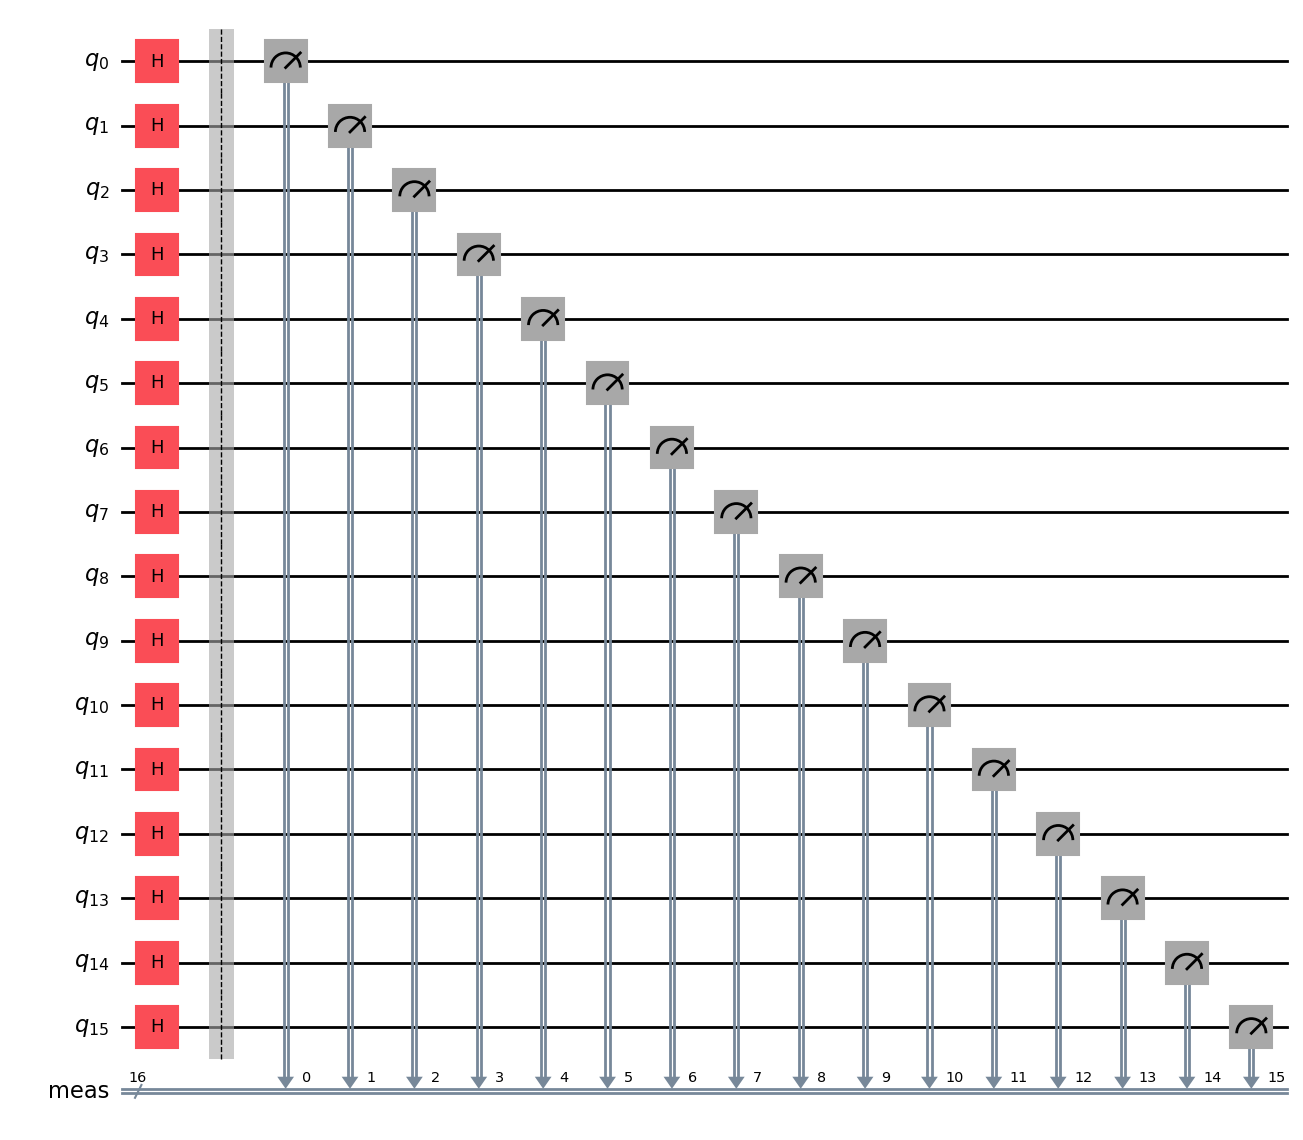

In [3]:
#initializing  quantum circuit
N=16# qubits number
qc = QuantumCircuit(N)   #N = 16 qubit. N=16 classical bits



#Defining the circuit to the  generation of randon numbers

#Apply Hadamard to all qubits

qc.h(range(N))

#Measure

qc.measure_all()

#print

qc.draw("mpl")

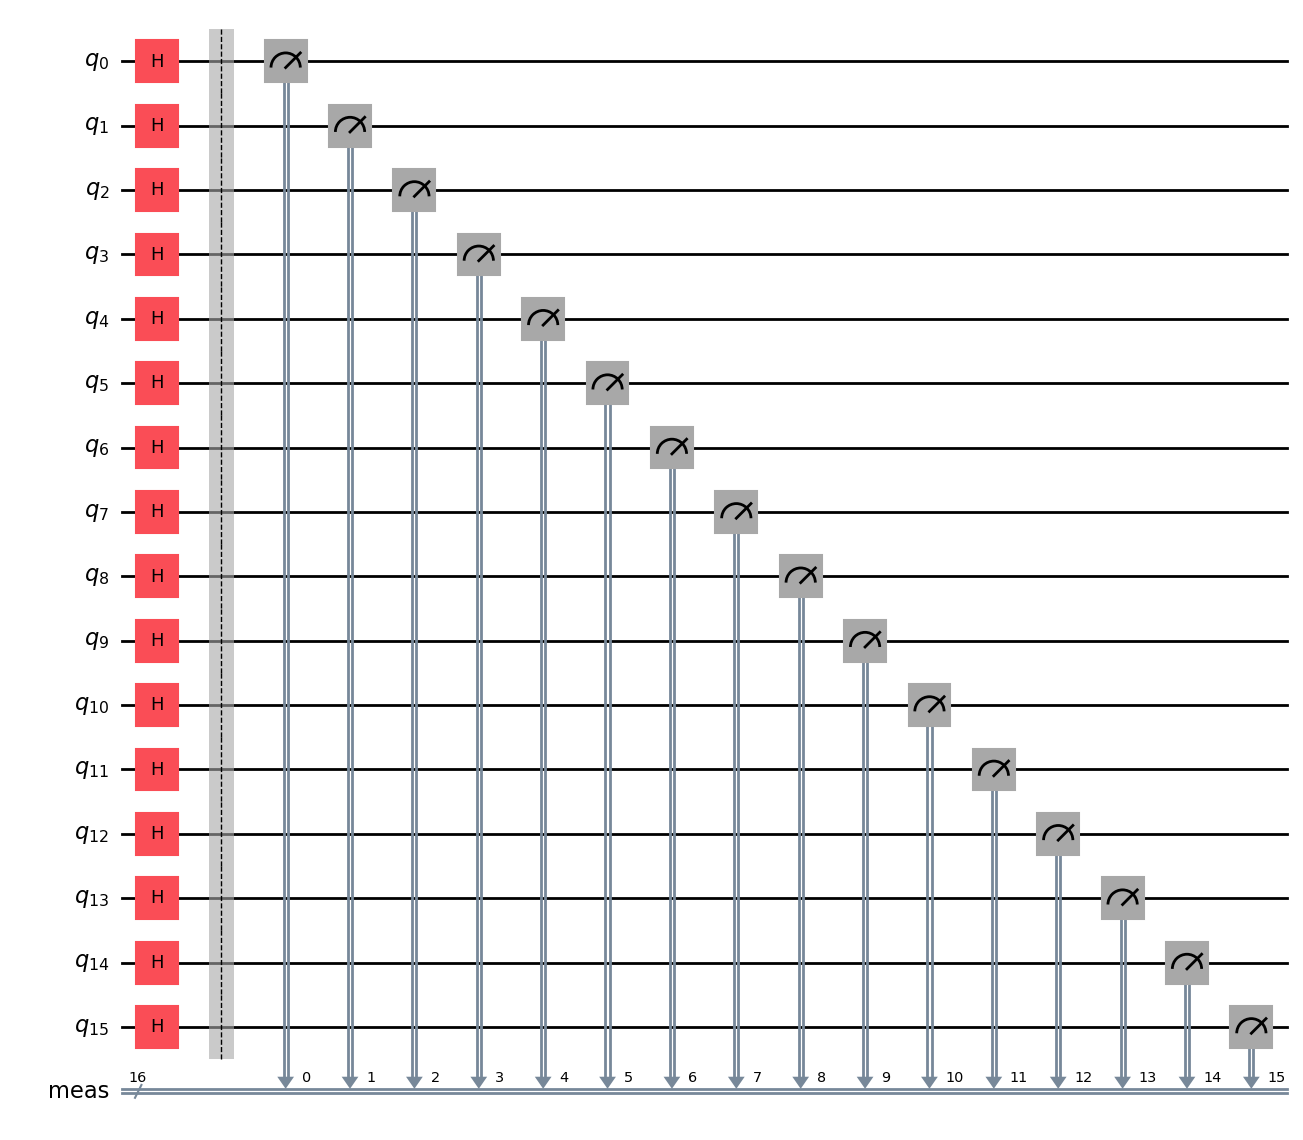

In [4]:
#Transpiling the circuit, it is needed if we want to send to a real QC

qct = transpile(qc,backend = backend_aer) 

#Drawing the trasnpiled circuit
qct.draw("mpl")

In [5]:
job_aer = sampler_aer.run([(qct, None, 1)]) # running the transpiled circuit 1 time

result = job_aer.result() #Getting the results   

counts = result[0].data.meas.get_counts() #Meassuring results. According to the circuit we measure 'meas'
#counts
print('RESULT ', counts)

RESULT  {'0010011100001100': 1}


Since I want just one randon number I need to run the circuit just once

In [6]:
#binary = raw_input(counts)

#int(0011000001001010, 2)